In [1]:
import pandas as pd
import numpy as np

# !pip install pyhhmm
from pyhhmm.gaussian import GaussianHMM
# from hmmlearn.hmm import GaussianHMM
from pandas_datareader import data as pdr
import yfinance as yf
import matplotlib.pyplot as plt



### Data Management

In [2]:
# Data Extraction

start_date = '2017-01-01'
end_date= '2022-06-01'
symbol = 'SPY'
yf.pdr_override()
# df = DataReader(name=symbol, data_source='yahoo', start=start_date, end=end_date)
df = pdr.get_data_yahoo(symbol, start=start_date, end=end_date)
data = df[["Open", "High", "Low", "Adj Close", "Volume"]]

[*********************100%***********************]  1 of 1 completed


In [3]:
df = data.copy()
df["Returns"] = (df["Adj Close"] / df["Adj Close"].shift(1)) - 1
df["Range"] = (df["High"]/df["Low"]) - 1
df.dropna(inplace=True)
df.head()

,Open,High,Low,Adj Close,Volume,Returns,Range
Date,,,,,,,
2017-01-04,225.619995,226.750000,225.610001,202.535187,78744400,0.005949,0.005053
2017-01-05,226.270004,226.580002,225.479996,202.374252,78379000,-0.000795,0.004879
2017-01-06,226.529999,227.750000,225.899994,203.098312,71559900,0.003578,0.008189
2017-01-09,226.910004,227.070007,226.419998,202.427917,46939700,-0.003301,0.002871
2017-01-10,226.479996,227.449997,226.009995,202.427917,63771900,0.000000,0.006371


In [4]:
X_train = df[["Returns", "Range"]]
X_train.head()

,Returns,Range
Date,,
2017-01-04,0.005949,0.005053
2017-01-05,-0.000795,0.004879
2017-01-06,0.003578,0.008189
2017-01-09,-0.003301,0.002871
2017-01-10,0.000000,0.006371


### HMM Learning

In [5]:
# hmm_model = GaussianHMM(n_components=4, covariance_type="full", n_iter=100).fit(X_train)


In [6]:
model = GaussianHMM(n_states=4, covariance_type="full", n_emissions=2)
model.train([np.array(X_train.values)])

f:\anaconda3\envs\statarb\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
f:\anaconda3\envs\statarb\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


(<pyhhmm.gaussian.GaussianHMM at 0x223af0d8a90>, 9629.4286372624)

In [11]:
# Check Results
# hidden_states = hmm_model.predict(X_train)
hidden_states = model.predict([X_train.values])[0]
hidden_states[:40]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [13]:
model.means

array([[ 0.00109553,  0.01410238],
       [-0.00695037,  0.0234371 ],
       [ 0.0019878 ,  0.00736758],
       [ 0.02697556,  0.03625557]])

In [14]:
# Regime state covars for each feature
model.covars

array([[[ 2.97554375e-04,  1.90174963e-04],
        [ 1.90174963e-04,  2.08037097e-04]],

       [[ 4.01629730e-04, -7.93057289e-05],
        [-7.93057289e-05,  1.75956744e-04]],

       [[ 4.04216219e-05,  1.33284245e-05],
        [ 1.33284245e-05,  2.21428035e-05]],

       [[ 1.08640014e-03,  8.08237633e-04],
        [ 8.08237633e-04,  8.56966585e-04]]])

### Data Visualization

In [17]:
# Structure the prices for plotting
i = 0
labels_0 = []
labels_1 = []
labels_2 = []
labels_3 = []

prices = df["Adj Close"].values.astype(float)
print("Correct number of rows: ", len( prices ) == len( hidden_states ))

for s in hidden_states:
    if s == 0:
        labels_0.append(prices[i])
        labels_1.append(float('nan'))
        labels_2.append(float('nan'))
        labels_3.append(float('nan'))
    if s == 1:
        labels_0.append(float('nan'))
        labels_1.append(prices[i])
        labels_2.append(float('nan'))
        labels_3.append(float('nan'))
    if s == 2:
        labels_0.append(float('nan'))
        labels_1.append(float('nan'))
        labels_2.append(prices[i])
        labels_3.append(float('nan'))
    if s == 3:
        labels_0.append(float('nan'))
        labels_1.append(float('nan'))
        labels_2.append(float('nan'))
        labels_3.append(prices[i])
    i += 1

Correct number of rows:  True


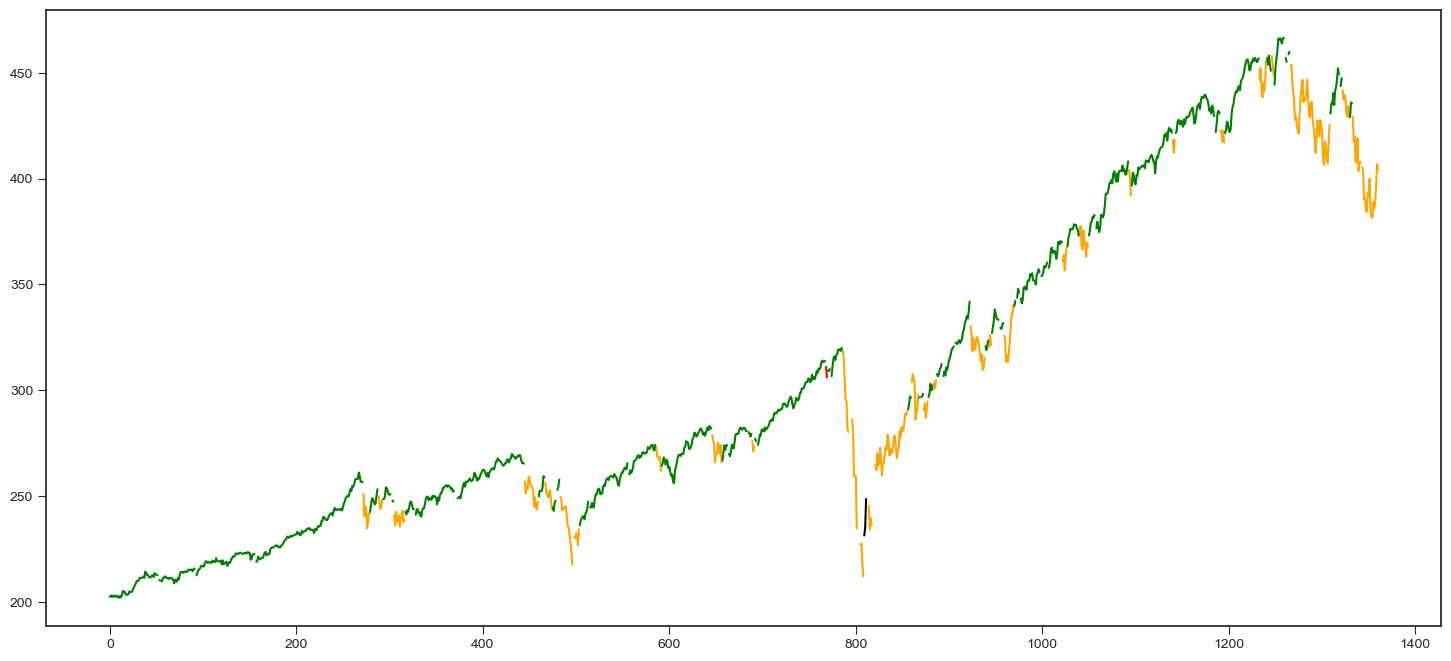

In [19]:
fig = plt.figure(figsize = (18, 8) )
plt.plot(labels_0, color = "red")
plt.plot(labels_1, color = "orange")
plt.plot(labels_2, color = "green")
plt.plot(labels_3, color = "black")
plt.show()
